In [1]:
from fujiwara_circuit import *

In [2]:
# Circuit with no position-dependent coin operator

n = 3 # number of qubits encoding the position
n_step = 2 # number of steps
n_shot = 1024
qc_1 = circuit(n, n_step)

# Circuit with position-dependent coin operator
coin_list = []
Hadamard = np.array([[1,1],[1,-1]])/np.sqrt(2)
Z = np.array([[1,0],[0,-1]])
for i in range(int(pow(2,n))):
    if i % 2 == 0:
        coin_list.append(Hadamard)
    else:
        coin_list.append(Z)
        
qc_2 = circuit(n, n_step, position_dependent=True, coin_list=coin_list)

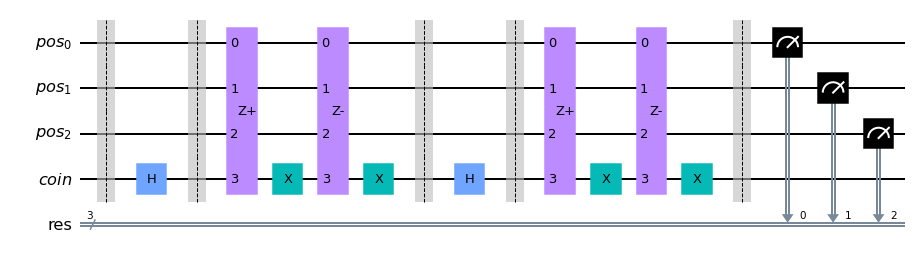

In [3]:
qc_1.draw("mpl")

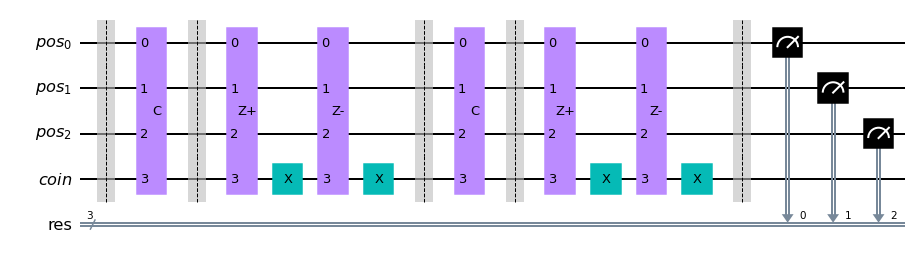

In [4]:
qc_2.draw("mpl")

In [5]:
counts_simulation_qc_1 = execute_simulation(qc_1, n_shot)
counts_simulation_qc_2 = execute_simulation(qc_2, n_shot)

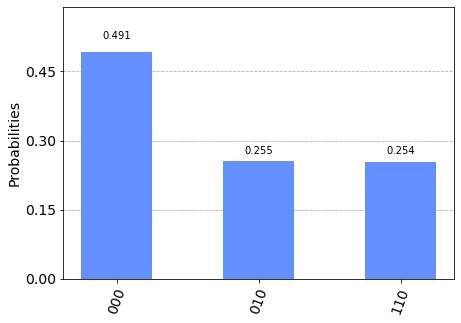

In [6]:
plot_histogram(counts_simulation_qc_1)

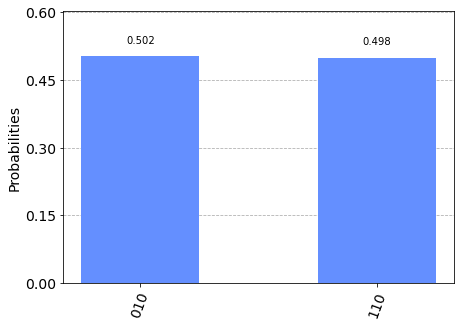

In [7]:
plot_histogram(counts_simulation_qc_2)

In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

In [ ]:
# qc_1
device = provider.get_backend('ibmq_manila')
job = execute(qc_1, backend=device, shots=1024)
job_monitor(job)
device_result = job.result()
counts_real_qc_1 = device_result.get_counts(qc_1)

ibmqfactory.load_account:WARNING:2022-04-08 22:36:04,444: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is queued (7)     

In [ ]:
# qc_2
job = execute(qc_2, backend=device, shots=1024)
job_monitor(job)
device_result = job.result()
counts_real_qc_2 = device_result.get_counts(qc_2)

In [ ]:
plot_histogram(counts_real_qc_1)

In [ ]:
plot_histogram(counts_real_qc_2)